In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
transporte = pd.read_csv('data/20239.csv', sep=';')
transporte = transporte[transporte['Viajeros y tasas'] == "Viajeros transportados"]

In [178]:
transporte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8175 entries, 0 to 23870
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tipo de transporte: Nivel 1  8175 non-null   object
 1   Tipo de transporte: Nivel 2  7848 non-null   object
 2   Tipo de transporte: Nivel 3  6867 non-null   object
 3   Tipo de transporte: Nivel 4  4251 non-null   object
 4   Tipo de transporte: Nivel 5  654 non-null    object
 5   Viajeros y tasas             8175 non-null   object
 6   Periodo                      8175 non-null   object
 7   Total                        5439 non-null   object
dtypes: object(8)
memory usage: 574.8+ KB


In [148]:
interurbano = transporte[transporte["Tipo de transporte: Nivel 2"] == "Transporte interurbano regular"]
#
ferrocarril = interurbano[interurbano["Tipo de transporte: Nivel 3"] == "Interurbano por ferrocarril"].copy()
aereo = interurbano[interurbano["Tipo de transporte: Nivel 3"] == "Interurbano Aéreo (interior)"].copy()
autobus = interurbano[interurbano["Tipo de transporte: Nivel 3"] == "Interurbano por autobús regular"].copy()


In [149]:
ave = ferrocarril[ferrocarril["Tipo de transporte: Nivel 5"] == "Alta Velocidad"]
ave = ave.rename(columns={"Tipo de transporte: Nivel 1":"Modo de transporte"})
ave = ave.drop(columns=["Tipo de transporte: Nivel 2","Tipo de transporte: Nivel 3","Tipo de transporte: Nivel 4","Tipo de transporte: Nivel 5","Viajeros y tasas"])
ave = ave.sort_values(by="Periodo")
ave = ave.dropna()
ave["Total"] = ave["Total"].str.replace(".","")
ave["Total"] = ave["Total"].astype(int)
ave = ave.groupby(by="Periodo").sum().reset_index()

In [150]:
aereo = aereo.drop(columns=["Tipo de transporte: Nivel 2","Tipo de transporte: Nivel 3","Tipo de transporte: Nivel 4","Tipo de transporte: Nivel 5","Viajeros y tasas"])
aereo = aereo.rename(columns={"Tipo de transporte: Nivel 1":"Modo de transporte"})

aereo = aereo.dropna()
aereo = aereo.sort_values(by="Periodo")
aereo["Total"] = aereo["Total"].str.replace(".","")
aereo["Total"] = aereo["Total"].astype(int)
aereo = aereo.groupby("Periodo").sum().reset_index()

In [151]:
autobus = autobus.rename(columns={"Tipo de transporte: Nivel 1":"Modo de transporte"})

autobuses_tipos =['Transporte interurbano regular por autobús: Media distancia',
       'Transporte interurbano regular por autobús: Larga distancia']
autobus = autobus[autobus["Tipo de transporte: Nivel 4"].isin(autobuses_tipos)]
autobus = autobus.drop(columns=["Tipo de transporte: Nivel 2","Tipo de transporte: Nivel 3","Tipo de transporte: Nivel 4","Tipo de transporte: Nivel 5","Viajeros y tasas"])
autobus = autobus.dropna()
autobus = autobus.sort_values(by="Periodo")
autobus["Total"] = autobus["Total"].str.replace(".","")
autobus["Total"] = autobus["Total"].astype(int) 
autobus = autobus.groupby("Periodo").sum().reset_index()

In [152]:
autobus["Modo de transporte"] = "Autobus"
ave["Modo de transporte"] = "Alta Velocidad"
aereo["Modo de transporte"] = "Aéreo"

In [153]:
ave.info()
autobus.info()
aereo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Periodo             99 non-null     object
 1   Modo de transporte  99 non-null     object
 2   Total               99 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Periodo             171 non-null    object
 1   Modo de transporte  171 non-null    object
 2   Total               171 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Periodo  

In [163]:
transporte = pd.concat([autobus,ave,aereo])
transporte["year"] = transporte["Periodo"].str[:4].astype(int)
transporte["month"] = transporte["Periodo"].str[5:].astype(int)
transporte["date"] = pd.to_datetime(dict(year=transporte.year, month=transporte.month,day=1))

In [164]:
transporte["date"]

0     2009-01-01
1     2009-02-01
2     2009-03-01
3     2009-04-01
4     2009-05-01
         ...    
322   2022-11-01
323   2022-12-01
324   2023-01-01
325   2023-02-01
326   2023-03-01
Name: date, Length: 597, dtype: datetime64[ns]

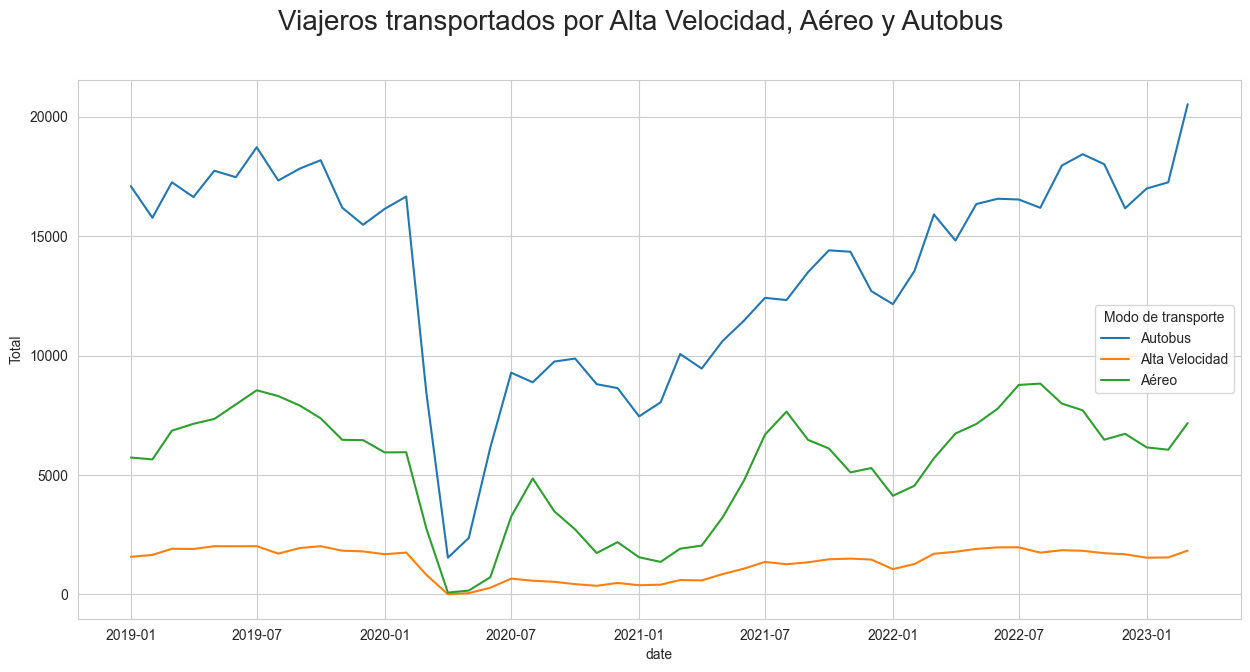

In [175]:
from datetime import date as dt
from_date = dt(2019,1,1)
fig ,ax = plt.subplots(figsize=(15,7))
sns.set_style("whitegrid")
sns.lineplot(data=transporte[transporte["date"].dt.date >= from_date], x="date", y="Total", hue="Modo de transporte",ax=ax)
fig.suptitle("Viajeros transportados por Alta Velocidad, Aéreo y Autobus", fontsize=20)
fig.savefig("results/transporte.png")